Example taken from https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

Data: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [1]:
import numpy

import pandas

from tensorflow.keras import Input

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from eval_model import eval_model

import wvpy.util

Using TensorFlow backend.


In [2]:
# load dataset
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
dataframe = None
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
dataset = None

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
Y = None


# baseline model
def create_baseline():
    # create model
    input = Input(shape=(60,))
    l1 = Dense(60, activation='relu')(input)
    l2 = Dense(1, activation='sigmoid')(l1)
    model = Model(inputs=[input], outputs=[l2])
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)

In [3]:

kfold = StratifiedKFold(n_splits=5, shuffle=True)

In [4]:
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 83.70% (4.51%)


In [6]:
# drops to noise level as expected

encoded_Y_shuffled = encoded_Y.copy()
numpy.random.shuffle(encoded_Y_shuffled)

results_shuffled = cross_val_score(pipeline, X, encoded_Y_shuffled, cv=kfold)

In [7]:
print("Shuffled: %.2f%% (%.2f%%)" % (results_shuffled.mean()*100, results_shuffled.std()*100))

Shuffled: 45.71% (3.13%)


In [8]:
preds_out, results = eval_model(model=pipeline, X=X, y=encoded_Y)

In [9]:
print("eval: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

eval: 82.22% (6.51%)


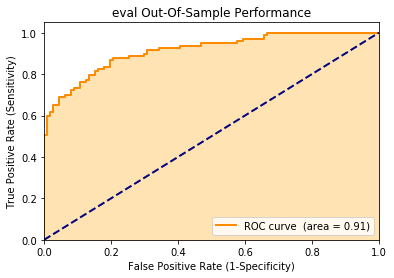

0.9134392124082845

In [10]:
wvpy.util.plot_roc(
    prediction=preds_out['prediction'], 
    istrue=encoded_Y, 
    title="eval Out-Of-Sample Performance")

In [11]:
preds_out_shuffled, results_shuffled = eval_model(model=pipeline, X=X, y=encoded_Y_shuffled)

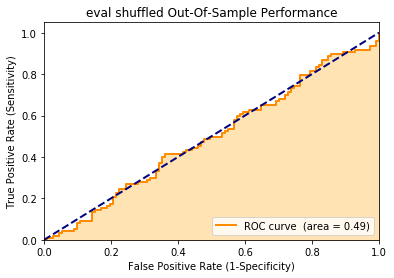

0.4927092040494102

In [12]:
wvpy.util.plot_roc(
    prediction=preds_out_shuffled['prediction'], 
    istrue=encoded_Y_shuffled, 
    title="eval shuffled Out-Of-Sample Performance")